<a href="https://colab.research.google.com/github/Tashika-Wijesooriya/research-/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/echo


 3dcnn_echo_model.h5   3dcnn_echo_model.keras   MeasurementsList.csv  'set 1'


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/echo/MeasurementsList.csv")
df.head()


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.970,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.970,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.970,1024.0,768,train
3,4,0XAD41A03F4A5B9ABC,LVPWd,0.761081,101,465,491,524,498,202,19.965,1024.0,768,train
4,5,0XAD41A03F4A5B9ABC,LVIDs,2.721935,119,495,578,451,349,202,19.965,1024.0,768,train


In [4]:
print(df.columns)


Index(['Unnamed: 0', 'HashedFileName', 'Calc', 'CalcValue', 'Frame', 'X1',
       'X2', 'Y1', 'Y2', 'Frames', 'FPS', 'Width', 'Height', 'split'],
      dtype='object')


In [5]:
df.head(5)


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.970,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.970,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.970,1024.0,768,train
3,4,0XAD41A03F4A5B9ABC,LVPWd,0.761081,101,465,491,524,498,202,19.965,1024.0,768,train
4,5,0XAD41A03F4A5B9ABC,LVIDs,2.721935,119,495,578,451,349,202,19.965,1024.0,768,train


In [6]:
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"
os.listdir(VIDEO_PATH)[:5]


['0X5D1938B075D9891E.avi',
 '0X1B99DC72C8AD6D9C.avi',
 '0X4B23570952E6A1F2.avi',
 '0X7E6ECB0620C1F8B.avi',
 '0X6F134BF6933C239F.avi']

In [7]:
df["HashedFileName"].iloc[0]


'0X66EFA90ADBC0BA4F'

In [8]:
df[df["HashedFileName"] == df["HashedFileName"].iloc[0]]


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.97,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.97,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.97,1024.0,768,train


In [9]:
df_lvh = df[df["Calc"].isin(["IVSd", "LVPWd"])]

labels = (
    df_lvh
    .groupby("HashedFileName")["CalcValue"]
    .max()
    .reset_index()
)

labels["label"] = (labels["CalcValue"] >= 1.1).astype(int)
labels.head()


,HashedFileName,CalcValue,label
0,0X100EC1C77A847AA7,1.616694,1
1,0X1015CA08CEBF3730,1.269556,1
2,0X1017398D3C3F5FF9,1.471461,1
3,0X10207E7A278639F3,0.818880,0
4,0X1023A55040C84F27,1.167655,1


In [10]:
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

video_name = os.listdir(VIDEO_PATH)[0]
video_name


'0X5D1938B075D9891E.avi'

In [11]:
video_id = video_name.replace(".avi", "")

label = labels[labels["HashedFileName"] == video_id]["label"].values[0]
print("Video:", video_name)
print("Label:", label)


Video: 0X5D1938B075D9891E.avi
Label: 0


In [12]:
import cv2
import matplotlib.pyplot as plt
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

video_name = os.listdir(VIDEO_PATH)[0]
video_path = os.path.join(VIDEO_PATH, video_name)

cap = cv2.VideoCapture(video_path)

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

print("Total frames:", len(frames))


Total frames: 123


(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

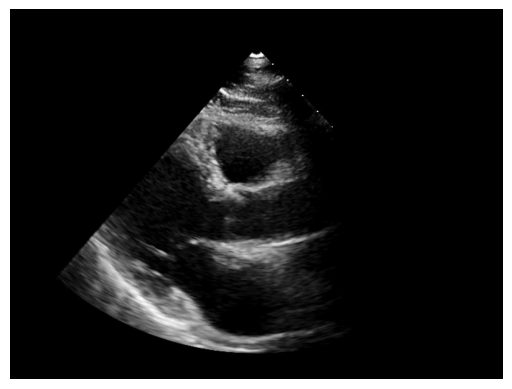

In [13]:
plt.imshow(frames[0][:,:,::-1])
plt.axis("off")


In [14]:
import cv2
import numpy as np

IMG_SIZE = 112      # image height & width
MAX_FRAMES = 16     # number of frames per video

def load_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while len(frames) < MAX_FRAMES:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
        frame = frame / 255.0   # normalize (0–1)
        frames.append(frame)

    cap.release()

    # if video has less frames, repeat last frame
    while len(frames) < MAX_FRAMES:
        frames.append(frames[-1])

    return np.array(frames)


In [15]:
video_tensor = load_video(video_path)

print(video_tensor.shape)


(16, 112, 112, 3)


In [16]:
import os
import numpy as np

X = []
y = []

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

for video_file in os.listdir(VIDEO_PATH):
    if not video_file.endswith(".avi"):
        continue

    video_path = os.path.join(VIDEO_PATH, video_file)
    video_id = video_file.replace(".avi", "")

    # get label
    label_row = labels[labels["HashedFileName"] == video_id]

    if len(label_row) == 0:
        continue  # skip if no label

    label = label_row["label"].values[0]

    # load video
    video_data = load_video(video_path)

    X.append(video_data)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (592, 16, 112, 112, 3)
y shape: (592,)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


In [18]:
model = Sequential([
    Conv3D(32, kernel_size=(3,3,3), activation='relu',
           input_shape=(16, 112, 112, 3)),
    MaxPooling3D(pool_size=(2,2,2)),

    Conv3D(64, kernel_size=(3,3,3), activation='relu'),
    MaxPooling3D(pool_size=(2,2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # binary output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 14, 110, 110,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 7, 55, 55, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 5, 53, 53, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 2, 26, 26, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,133,825 (42.47 MB)

 Trainable params: 11,133,825 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train samples:", X_train.shape[0])
print("Val samples:", X_val.shape[0])


Train samples: 473
Val samples: 119


In [22]:
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)


X shape: (592, 16, 112, 112, 3)
X_train shape: (473, 16, 112, 112, 3)


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=4,
    callbacks=[early_stop]
)


Epoch 1/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.6257 - loss: 0.7713 - val_accuracy: 0.6218 - val_loss: 0.6016
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6541 - loss: 0.5881 - val_accuracy: 0.6723 - val_loss: 0.5839
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6796 - loss: 0.5766 - val_accuracy: 0.6639 - val_loss: 0.5561
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7617 - loss: 0.4803 - val_accuracy: 0.6723 - val_loss: 0.5707
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8047 - loss: 0.4086 - val_accuracy: 0.6134 - val_loss: 0.6024
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3242 - val_accuracy: 0.5966 - val_loss: 0.8349


In [24]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 700ms/step - accuracy: 0.6666 - loss: 0.5453
Validation Accuracy: 0.6638655662536621


In [25]:
model.save("/content/drive/MyDrive/echo/3dcnn_echo_model.keras")


In [26]:
import numpy as np

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step


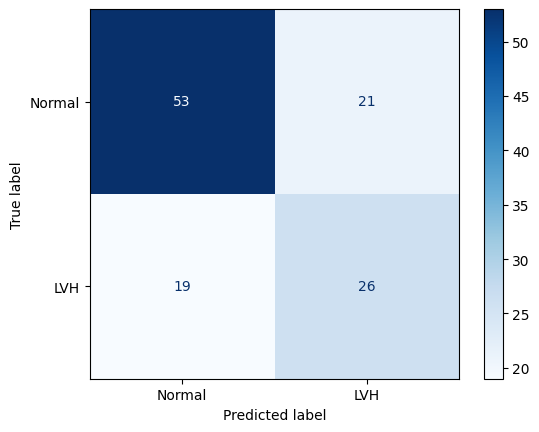

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Normal", "LVH"])
disp.plot(cmap="Blues")
plt.show()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(
    y_val, y_pred,
    target_names=["Normal", "LVH"]
))


              precision    recall  f1-score   support

      Normal       0.74      0.72      0.73        74
         LVH       0.55      0.58      0.57        45

    accuracy                           0.66       119
   macro avg       0.64      0.65      0.65       119
weighted avg       0.67      0.66      0.67       119



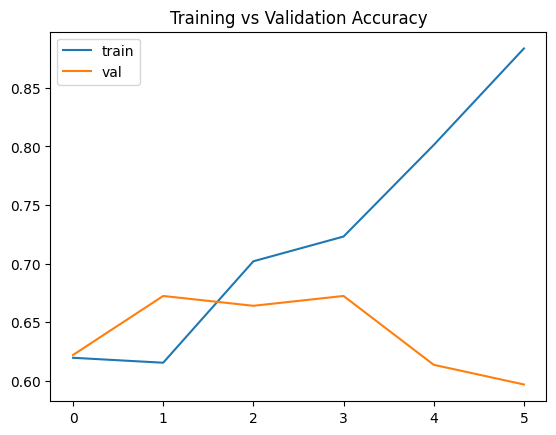

In [29]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
